In [52]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

%matplotlib inline

In [53]:
# Load Data 
housing_df = pd.read_csv(Path("../../data/housing_data_encoded.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
housing_df

,Identifier,Bedroom,Price,Average_Market_Days,RegionName_Crosby,RegionName_Houston,RegionName_Pasadena,RegionName_Porter,State_TX,Metro_Houston-The Woodlands-Sugar Land,CountyName_Harris County,CountyName_Montgomery County
Date,,,,,,,,,,,,
2010-01-31,2,1,67653.0,133.0,0,1,0,0,1,1,1,0
2010-01-31,2,2,89995.0,133.0,0,1,0,0,1,1,1,0
2010-01-31,2,3,116641.0,133.0,0,1,0,0,1,1,1,0
2010-01-31,2,4,167849.0,133.0,0,1,0,0,1,1,1,0
2010-01-31,2,5,303323.0,133.0,0,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,223,1,79380.0,100.0,0,0,1,0,1,1,1,0
2020-02-29,223,2,121517.0,100.0,0,0,1,0,1,1,1,0
2020-02-29,223,3,159204.0,100.0,0,0,1,0,1,1,1,0


In [54]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1220 entries, 2010-01-31 to 2020-02-29
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Identifier                              1220 non-null   int64  
 1   Bedroom                                 1220 non-null   int64  
 2   Price                                   1151 non-null   float64
 3   Average_Market_Days                     1030 non-null   float64
 4   RegionName_Crosby                       1220 non-null   int64  
 5   RegionName_Houston                      1220 non-null   int64  
 6   RegionName_Pasadena                     1220 non-null   int64  
 7   RegionName_Porter                       1220 non-null   int64  
 8   State_TX                                1220 non-null   int64  
 9   Metro_Houston-The Woodlands-Sugar Land  1220 non-null   int64  
 10  CountyName_Harris County                12

In [55]:
housing_df= housing_df.dropna()



In [56]:
housing_price_2020= housing_df.loc['2020']
#len(housing_price_2020)
housing_price_2020.corr()

,Identifier,Bedroom,Price,Average_Market_Days,RegionName_Crosby,RegionName_Houston,RegionName_Pasadena,RegionName_Porter,State_TX,Metro_Houston-The Woodlands-Sugar Land,CountyName_Harris County,CountyName_Montgomery County
Identifier,1.000000,-0.250057,-0.229307,0.727167,0.728833,-0.602216,-0.205000,0.588002,NaN,NaN,-0.588002,0.588002
Bedroom,-0.250057,1.000000,0.929843,-0.133892,-0.138409,0.415227,-0.271830,-0.138409,NaN,NaN,0.138409,-0.138409
Price,-0.229307,0.929843,1.000000,-0.164463,-0.172721,0.484220,-0.383951,-0.047817,NaN,NaN,0.047817,-0.047817
Average_Market_Days,0.727167,-0.133892,-0.164463,1.000000,0.978446,-0.322455,-0.232859,-0.085323,NaN,NaN,0.085323,-0.085323
RegionName_Crosby,0.728833,-0.138409,-0.172721,0.978446,1.000000,-0.333333,-0.218218,-0.111111,NaN,NaN,0.111111,-0.111111
RegionName_Houston,-0.602216,0.415227,0.484220,-0.322455,-0.333333,1.000000,-0.654654,-0.333333,NaN,NaN,0.333333,-0.333333
RegionName_Pasadena,-0.205000,-0.271830,-0.383951,-0.232859,-0.218218,-0.654654,1.000000,-0.218218,NaN,NaN,0.218218,-0.218218
RegionName_Porter,0.588002,-0.138409,-0.047817,-0.085323,-0.111111,-0.333333,-0.218218,1.000000,NaN,NaN,-1.000000,1.000000
State_TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metro_Houston-The Woodlands-Sugar Land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Calculate & display 2020  SMA
#housing_price_2020['SMA'] = housing_price_2020.rolling(window=20).mean()
#housing_price_2020[['Price', 'SMA']].plot(title='Housing Price in 2020 & 50 Days Price SMA',figsize=(10,6))


In [58]:
# Creating the X and y sets
X = housing_df.drop(columns=["Price", "Identifier", "State_TX", "Metro_Houston-The Woodlands-Sugar Land"]).values
y = housing_df["Price"].values

In [59]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, train_size= 0.7, random_state=0)


In [60]:
X_train[0]

array([ 4., 93.,  0.,  1.,  0.,  0.,  1.,  0.])

In [61]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [62]:
# Build and train the Deep Learning Model

# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [63]:
# Model set-up
number_input_features = 8
hidden_nodes_layer1 = 70
hidden_nodes_layer2 = 40

In [64]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
model.add(Dense(1, activation="linear"))

In [65]:
# Compile the model
model.compile(
    loss= "mean_squared_error",
    optimizer="adam",
    metrics= ['accuracy']
   
)

In [66]:
# Summarize the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 70)                630       
_________________________________________________________________
dense_11 (Dense)             (None, 40)                2840      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 41        
Total params: 3,511
Trainable params: 3,511
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Training the model
batch_size = 10
epochs = 1000
training_history = model.fit(
    X_scaled_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

ep - loss: 361036761.0811 - accuracy: 0.0000e+00
Epoch 826/1000
73/73 [==============================] - 0s 2ms/step - loss: 400830037.6216 - accuracy: 0.0000e+00
Epoch 827/1000
73/73 [==============================] - 0s 2ms/step - loss: 370817742.7027 - accuracy: 0.0000e+00
Epoch 828/1000
73/73 [==============================] - 0s 3ms/step - loss: 388368034.1622 - accuracy: 0.0000e+00
Epoch 829/1000
73/73 [==============================] - 0s 2ms/step - loss: 395773055.1351 - accuracy: 0.0000e+00
Epoch 830/1000
73/73 [==============================] - 0s 2ms/step - loss: 386466728.4324 - accuracy: 0.0000e+00
Epoch 831/1000
73/73 [==============================] - 0s 2ms/step - loss: 368592308.7568 - accuracy: 0.0000e+00
Epoch 832/1000
73/73 [==============================] - 0s 2ms/step - loss: 362472139.2432 - accuracy: 0.0000e+00
Epoch 833/1000
73/73 [==============================] - 0s 2ms/step - loss: 371379257.0811 - accuracy: 0.0000e+00
Epoch 834/1000
73/73 [=================

In [68]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=1)

10/10 [==============================] - 0s 2ms/step - loss: 224426131456.0000 - accuracy: 0.0000e+00


[224426131456.0, 0.0]

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler_y = MinMaxScaler().fit_transform(y_train)
y_scaled_train = scaler_y.transform(y_train)
y_scaled_test = scaler_y.transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[223174. 157161.  97965.  96411. 390638.  55704. 119186. 116422.  84886.
 297672. 138302.  92947.  85323. 107146. 399976.  78094.  66197. 143914.
 235069. 123792. 108983. 303716. 362116. 234391. 116185. 108656.  48807.
  99636.  88608. 158942.  55945. 142246. 292821.  48692. 296905.  65187.
  71537.  94545. 159204. 132441. 123866. 323600.  64045. 162823. 301892.
 133380. 291667. 388934. 353691. 195492. 159420. 139930.  64199. 303290.
  49106.  89916.  96645.  71308. 159557.  79932.  82954.  92938. 134275.
 121720.  78152. 133776.  97380.  51251. 104701. 390167.  68653. 135571.
  89826. 105815. 400679. 115630.  65020.  87477. 104592.  90563.  87438.
 106473. 133159. 106976. 158523. 171866.  48731.  48771. 401360. 112178.
  66254.  67833.  65044. 116683. 106271.  64285.  55057.  95217. 104090.
 114036. 123526. 114876. 148634. 143211.  53566. 133980.  98264. 111489.
 106855. 160232. 224836. 168286.  86168.  96324. 149218.  51828. 146917.
 386741. 130047.  50504. 101623. 182834. 227836. 137433. 296740.  68206.
 133907. 116642. 119813.  72466. 101299. 237271. 124861. 159184. 159722.
  49495.  64296. 291571. 212044.  94970.  70632. 112058. 138085. 136505.
  96789. 102559. 159283. 130990.  91990. 174131.  49069.  80808. 113152.
 155553.  82557.  63419. 299841.  82794. 111406. 110673. 220443. 106277.
  89254. 105016. 295882. 157660.  92189.  49300.  67670.  85185. 125769.
 142048. 107178. 400303. 294251. 103506. 114380. 189578.  49385.  67444.
 119590. 102751.  77322.  49452. 103437.  71091. 116615. 112074.  55593.
 222181. 134628.  90467.  62769.  94617. 112264. 157437.  63442.  65006.
 158518. 166425. 112148. 117878. 150988. 365511.  71657.  71178. 105863.
  77536. 385822. 120674.  49707.  77658. 108118. 383401. 101896.  81945.
 345731.  86714.  96679. 149571. 119222. 101017. 290639.  49560. 350522.
 214034.  78765.  66193.  62127.  63342.  84127. 204677. 112591.  85901.
  82233.  67653.  75160. 370759. 226676. 115638. 161775. 131994. 386720.
  95329.  97161.  66102. 390170. 200379.  49821.  96070.  64364. 160070.
 122527. 125953. 387175.  54204. 164434. 116704.  63561.  97911. 113740.
 386956. 167849.  62988. 177671. 233783. 138116. 103239. 400815. 390993.
  82428. 176138.  93252. 103192. 174656. 187916. 139590. 118433.  76384.
 100323.  94234.  72275.  49264.  62075. 218307. 385703. 112864.  63618.
 161218.  92028.  98072.  82362. 102976.  77009. 131958. 121618. 104701.
 104527. 223859.  91267.  82594.  80340.  78255.  97961.  73469. 386645.
 133112. 393711.  64471.  75576. 385954. 105479. 368105. 171802.  65170.
  86103.  98429.  68832. 116293. 308571. 119904. 119490. 145075. 159500.
  69828. 164861. 160409. 157596. 137515. 100296. 102290. 136804.  54995.
 211581. 157085. 153482. 159107.  64898. 146827. 108171. 328439. 389863.
 303323. 129305. 110185. 139193. 153370. 106186.  55884. 116956.  56953.
 386929.  96940. 233563.  77740. 399517. 301767. 303626.  76647. 127385.
  84556.  61670. 114389. 125649.  53448.  97146. 109599.  91227. 142366.
  62517.  79073.  99232. 140888. 136151. 158375.  95491. 216279.  88266.
 151387. 292501. 110988.  67260. 120406. 105502. 222092. 386004.  89290.
  83791. 138753.  72160.  55669. 135063.  51840.  99837. 163220.  71104.
  70720.  62637.  74731. 117936. 120315. 222476. 123199.  74562. 233452.
 113592. 386016.  53705.  52081. 141026.  55809. 325924.  49492. 234813.
 107329.  84945.  53446. 109871. 380839.  99399. 106161.  62636.  62639.
 176070.  73666. 159648. 154477. 106666. 160235.  49212.  61770.  76001.
 154655.  64308. 151175. 108877. 401643. 140843.  63376. 150628.  89833.
  63651. 303701.  52446.  52557. 126817.  95330.  55191.  67002. 123887.
  90254.  85397.  86373.  96118. 210383. 213010.  56307. 148519. 229649.
 132684. 151934.  82300. 210019. 165336. 145884. 124579. 128094. 151906.
  55150.  87363. 107622. 294021.  93633. 230337. 140629. 399859. 221985.
 175883. 389089. 156524. 140043. 121225. 106067. 158408. 163842.  67041.
  54640.  63538. 156855.  82607.  53030.  98105.  63834. 156578.  95591.
  75478.  89718. 107686. 168170. 122110. 391840.  69402.  55886.  94307.
  55862.  67147.  83240. 121517. 206312. 295076. 219320. 214595.  55322.
  49613.  81668.  89859.  65248.  48503.  62317.  87814. 135254.  61318.
  55567.  83259. 158996. 134177. 299230. 230931.  98258. 171843. 152016.
  63695. 131829. 125349. 136134. 123003. 167994.  69075.  65405.  48619.
 105952.  66817. 207891. 105155. 216757.  64616.  65099.  58100.  76023.
 357879.  62769. 181251. 150340. 401345. 162316. 126485. 105618.  63622.
  66721.  63800. 167619. 124553. 167762. 395248. 167668.  67411.  98793.
 304564. 158822. 114048.  89428. 390197. 187092. 144514.  82336. 290729.
  91342. 147397. 159847. 121954.  80291. 111702.  94232. 108095. 154429.
 102811. 399400. 211177. 120499.  86978. 102760.  82117.  73054. 144009.
 147984. 184194. 166423. 161813. 306078. 153841. 396213.  63872.  83662.
  49528.  99078. 126739. 158328.  82775.  57339.  86319.  89997. 228669.
  54402.  73132. 390187. 390078. 159314. 133146.  95907.  69656. 291921.
 102767. 159219. 119022. 102521.  65610. 320925. 158785. 297116. 152161.
 131892. 400688.  57239. 214725.  73317. 136410. 162932. 112442.  75188.
 125269.  97383. 167327. 164455.  87620. 113641.  88516.  83609. 168976.
 174780. 130304. 116313. 115520. 342966.  97544.  84208.  65346.  84496.
  79073. 109616.  53015. 138738. 141259.  61609.  95051. 304314.  95819.
  71398. 197299.  77014.  64710.  96093. 297422. 133055. 117362.  88828.
  62047.  97511.  83829. 140703.  64964. 105555. 111135. 158944. 127016.
 126073. 236717.  82282. 401211. 162519. 101855.  80001. 106541. 100164.
 221278. 390238. 117388. 160637. 234013. 137720.  63894. 392915. 111207.
 129132. 137802. 143623.  63880.  99373. 118103.  77320. 133543. 112224.
 345061.  92460.  82763.  68483. 122624.  48902. 222853. 227410. 119163.
  65031.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [71]:
# Make predictions using the testing data X_test
predicted = model.predict(X_scaled_test)

In [72]:
len(predicted)

309

In [73]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

ValueError: non-broadcastable output operand with shape (309,1) doesn't match the broadcast shape (309,8)

In [74]:
# Create a DataFrame of Real and Predicted values
housing_model = pd.DataFrame({
    "Actual": y_test.ravel(),
    "Predicted": predicted.ravel()
}, index = housing_df.index[-len(y_test): ]) 

# Show the DataFrame's head
housing_model.head()

,Actual,Predicted
Date,,
2017-05-31,65705.0,57066.707031
2017-05-31,221685.0,217832.890625
2017-05-31,96417.0,116672.195312
2017-06-30,69231.0,56871.914062
2017-06-30,131921.0,118250.375000


<AxesSubplot:title={'center':'Actual Vs. Predicted Housing Prices in Houston'}, xlabel='Date'>

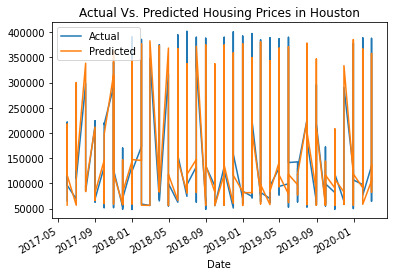

In [75]:
# Plot the real vs predicted prices as a line chart
housing_model.plot(title="Actual Vs. Predicted Housing Prices in Houston")